# Feynn Labs Internship - Project 2

### Electric Vehicle Market Segmentation

By: Padala Akhil Reddy

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Loading the datasets

In [2]:
df1 = pd.read_csv('./Datasets/1_ev_charger_dataset.csv')

df2 = pd.read_excel('./Datasets/2_ev_charging_station_dataset.xlsx', sheet_name='Table 4', header=1)

df3 = pd.read_excel('./Datasets/3_ev_market_india_dataset.xlsx')

In [3]:
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [4]:
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [5]:
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Exploratory Data Analysis

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


### 2-wheeler EVs: State-wise distribution

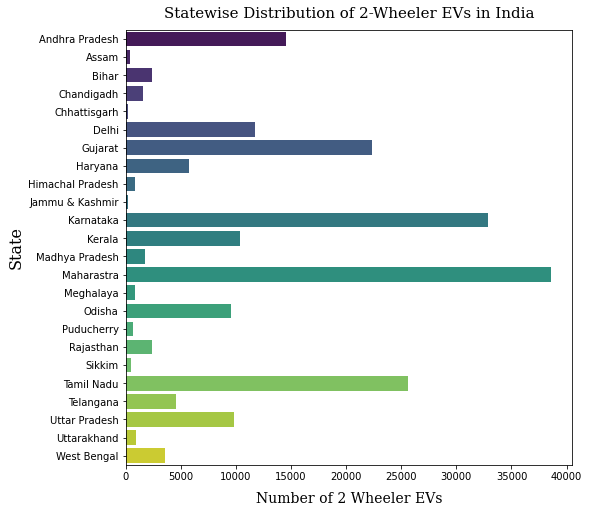

In [27]:
with mpl.rc_context({'figure.figsize': (8, 8)}):
    plt.figure()
    sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W', palette='viridis')
    plt.ylabel('State', fontsize=16, family='serif')
    plt.xlabel('Number of 2 Wheeler EVs', family='serif', fontsize=14, labelpad=10)
    plt.title(label='Statewise Distribution of 2-Wheeler EVs in India', family='serif', size=15, pad=12)
    # plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

##### Observations: Andhra Pradesh, Gujarat, Karnataka, Maharashtra and Tamil Nadu are those states which have maximum number of 2 wheeler EVs while Assam, Jammu & Kashmir, Sikkim and Himachal Pradesh have the least number of 2-wheeler EVs.

### 3-wheeler EVs: State-wise distribution

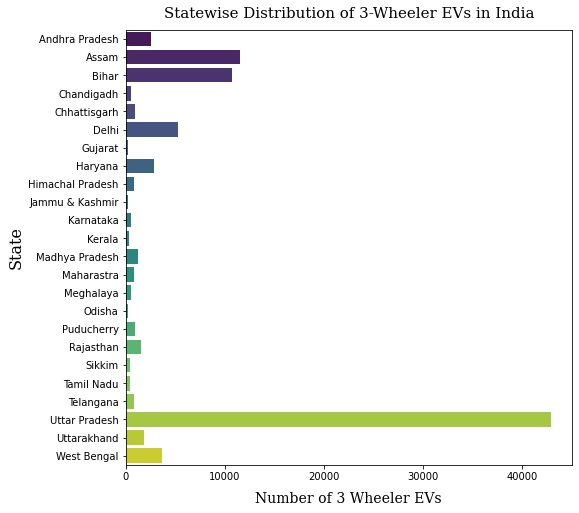

In [28]:
with mpl.rc_context({'figure.figsize': (8, 8)}):
    plt.figure()
    sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W', palette='viridis')
    plt.ylabel('State', fontsize=16, family='serif')
    plt.xlabel('Number of 3 Wheeler EVs', family='serif', fontsize=14, labelpad=10)
    plt.title(label='Statewise Distribution of 3-Wheeler EVs in India', family='serif', size=15, pad=12)
    # plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

##### Observations: Uttar Pradesh, Assam and Bihar have highest number of 3-wheelers, where Gujarat, J&K, and Odisha have the least number of 3-wheelers.

### 4-wheeler EVs: State-wise distribution

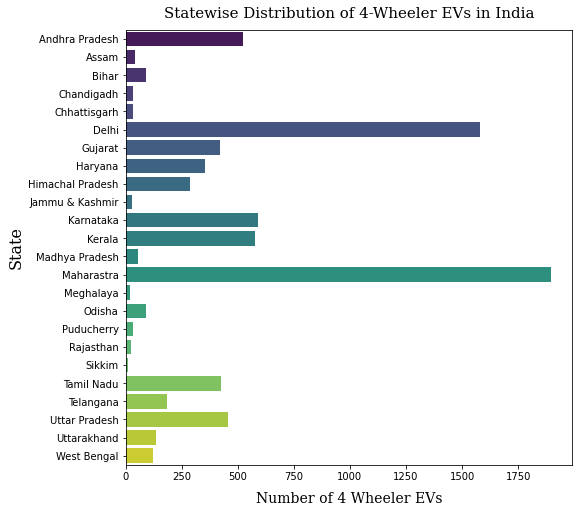

In [30]:
with mpl.rc_context({'figure.figsize': (8, 8)}):
    plt.figure()
    sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W', palette='viridis')
    plt.ylabel('State', fontsize=16, family='serif')
    plt.xlabel('Number of 4 Wheeler EVs', family='serif', fontsize=14, labelpad=10)
    plt.title(label='Statewise Distribution of 4-Wheeler EVs in India', family='serif', size=15, pad=12)
    #plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

### Statewise distribution of Charging stations.

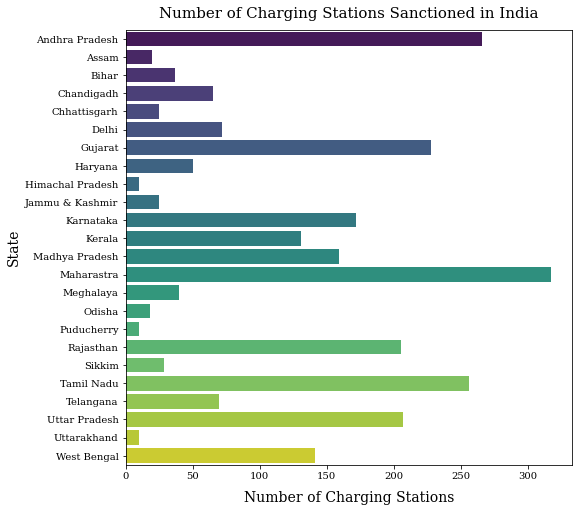

In [31]:
with mpl.rc_context({'figure.figsize': (8, 8)}):
    sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
    plt.ylabel('State', fontsize=14, family='serif')
    plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
    plt.xticks(family='serif')
    plt.yticks(family='serif')
    plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
    #plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

### Statewise distribution of EV charging retail outlets.

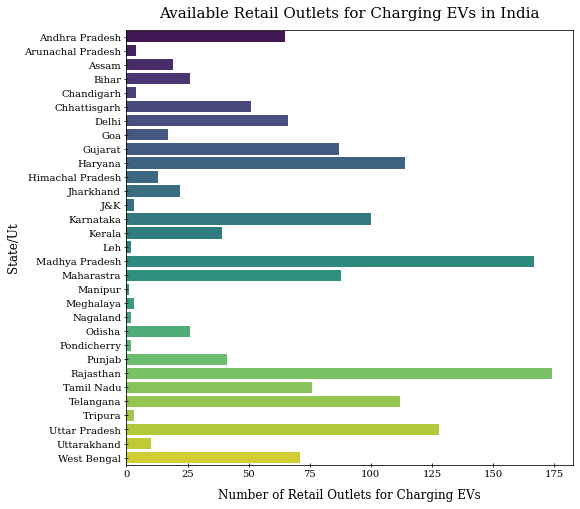

In [32]:
with mpl.rc_context({'figure.figsize': (8, 8)}):
    sns.barplot(data=df2, y='State/UT', x='EV Charging Facility', palette='viridis')
    plt.xlabel('Number of Retail Outlets for Charging EVs', family='serif', size=12, labelpad=10)
    plt.ylabel('State/Ut', family='serif', size=12)
    plt.tick_params(direction='inout')
    plt.xticks(family='serif', size=10)
    plt.yticks(family='serif', size=10)
    plt.title(label='Available Retail Outlets for Charging EVs in India', weight=200, family='serif', size=15, pad=12)
    #plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

### Number of models by brand.

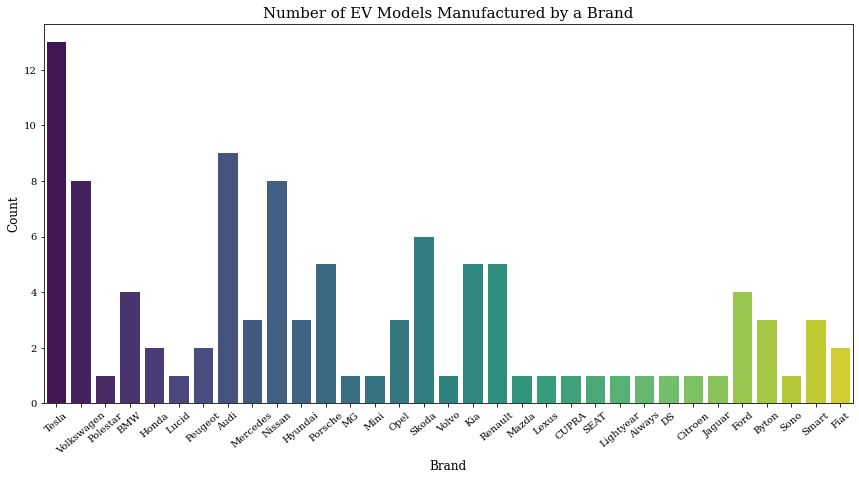

In [33]:
# brand-wise count of EV models
sns.catplot(data=df3, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

### Body Style distribution.

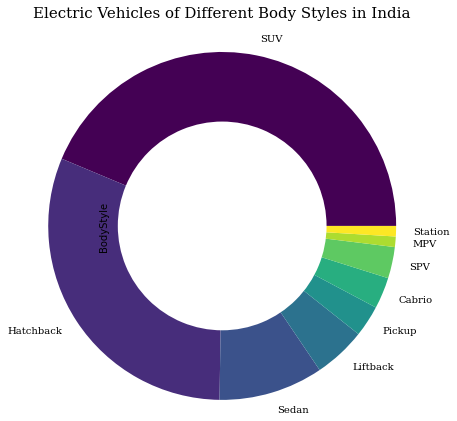

In [15]:
# different body types EVs visualization from dataset 3
x = df3['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Styles in India', family='serif', size=15, pad=100)
# plt.savefig('Body style fig.jpg', bbox_inches='tight')
plt.show()

### EVs of different number of seats.

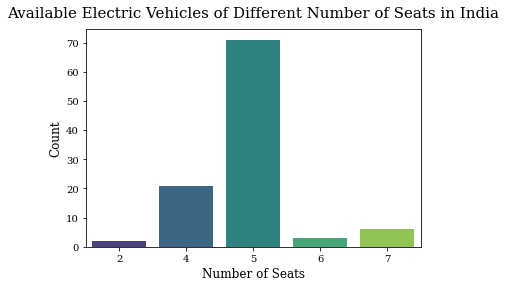

In [34]:
# EVs of different number of seats from dataset 3
sns.countplot(data=df3, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
# plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

### Comparison of EV brands based on driving range.

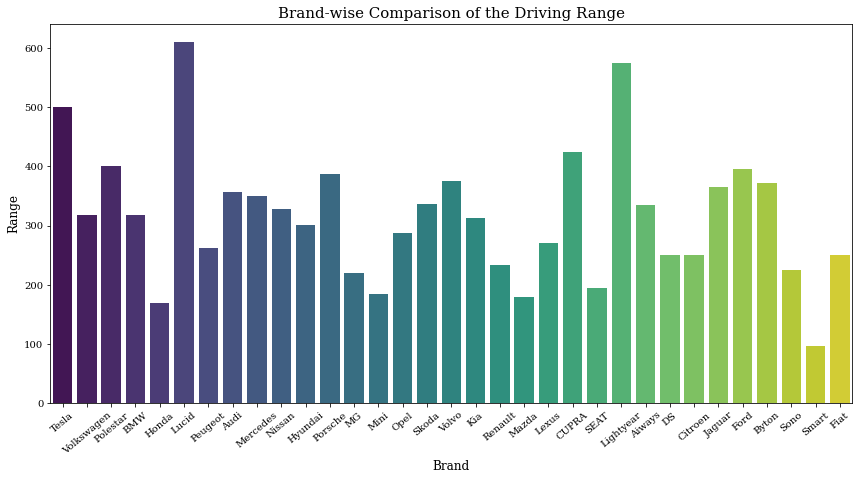

In [35]:
sns.catplot(kind='bar', data=df3, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Comparison of the Driving Range', family='serif', size=15);
# plt.savefig('fig.jpg', bbox_inches='tight')

### Determining the correlations between different columns of the electric vehicle brands dataset.

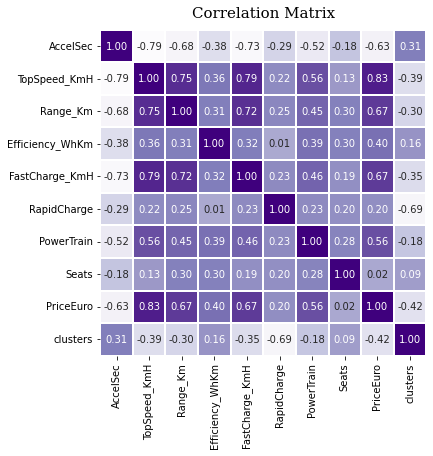

In [36]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df3.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);
#plt.savefig('fig.jpg', bbox_inches='tight')

### Clustering using K-means.

Encoding the categorical features.

In [20]:
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

Feature selection.

In [21]:
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


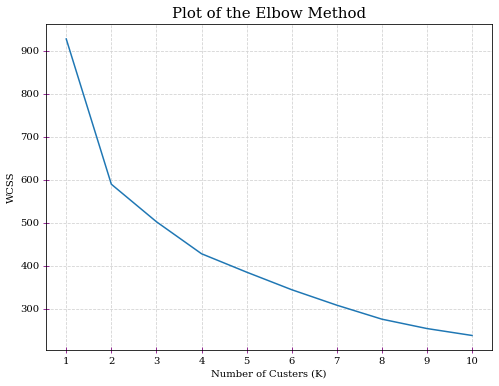

In [37]:
wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.savefig('fig.jpg', bbox_inches='tight')
plt.show()

In [24]:
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [25]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    39
2    32
3    19
0    13
dtype: int64

In [26]:
df3['clusters'] = kmean.labels_